In [1]:
from DenseNet import densenet
from label2onehot import label2onehot
from onehot2label import onehot2label
from label_dict import label_dict
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Use GPU
config = tf.ConfigProto( device_count = {'GPU': 2 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [3]:
x = np.load('train_resize.npy')/255.
y = np.load('train.npy')

In [4]:
onehot_y = label2onehot(y[:, 0], 256)

In [5]:
densemodel = densenet(x.shape[1:], 256, 64, 32, eve_layers=(6, 12, 24, 16), num_denseblock=4, dropout_rate=0.2, weight_decay=1e-4)

In [6]:
densemodel.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = densemodel.fit(x, onehot_y, epochs=10, batch_size=100, validation_split=0.25)

Train on 17868 samples, validate on 5956 samples
Epoch 1/10
17868/17868 [==============================] - 85s 5ms/step - loss: 10.2886 - acc: 0.0959 - val_loss: 10.0687 - val_acc: 0.0598
Epoch 2/10
17868/17868 [==============================] - 67s 4ms/step - loss: 8.2449 - acc: 0.1549 - val_loss: 9.9648 - val_acc: 0.0348
Epoch 3/10
17868/17868 [==============================] - 67s 4ms/step - loss: 6.7927 - acc: 0.2094 - val_loss: 8.2330 - val_acc: 0.0667
Epoch 4/10
17868/17868 [==============================] - 67s 4ms/step - loss: 5.7255 - acc: 0.2540 - val_loss: 6.9540 - val_acc: 0.1106
Epoch 5/10
17868/17868 [==============================] - 66s 4ms/step - loss: 4.9543 - acc: 0.3031 - val_loss: 6.3245 - val_acc: 0.1276
Epoch 6/10
17868/17868 [==============================] - 66s 4ms/step - loss: 4.3827 - acc: 0.3404 - val_loss: 6.0278 - val_acc: 0.1442
Epoch 7/10
17868/17868 [==============================] - 65s 4ms/step - loss: 3.9760 - acc: 0.3808 - val_loss: 5.7722 - val_ac

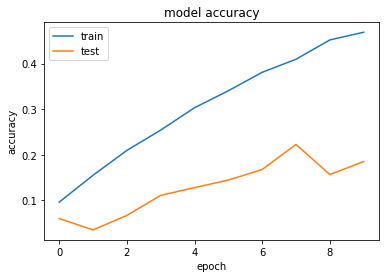

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

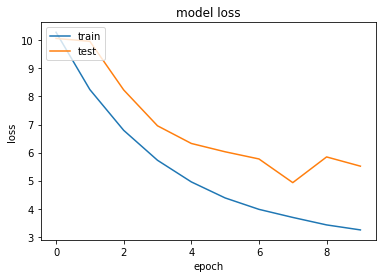

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
onehot_y.shape

(23824, 256)

In [11]:
a = onehot2label(onehot_y)

In [12]:
a[1][0] 

250.0

In [13]:
X_test = np.load('test_resize.npy')
Y_test = np.load('test.npy')

In [14]:
y_test = label2onehot(Y_test[:, 0], 256)

In [15]:
#evaluate
eva = densemodel.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print("Loss = " + str(eva[0]))
print("Test Accuracy = " + str(eva[1]))

5956/5956 [==============================] - 11s 2ms/step
()
Loss = 17.063012274901606
Test Accuracy = 0.0036937541974479517


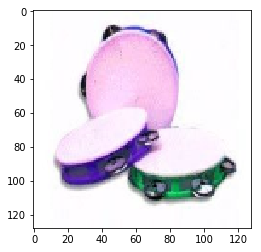

In [24]:
X_predict = X_test[4]
plt.imshow(X_predict)

In [25]:
#predict
predict_vector = densemodel.predict(np.expand_dims(X_predict, axis=0))
index = np.where(predict_vector[0] == np.max(predict_vector[0]))

In [26]:
dict_label = label_dict()

In [27]:
print('This image is: ' + dict_label[index[0][0]])

This image is: mattress
